In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset
data = pd.read_csv('/diabetes.csv')

In [3]:
# Data Exploration

# Columns available in the dataset
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [4]:
# Display the first few rows
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
# Describe the dataset
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [6]:
# Information of dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [7]:
# Data Cleaning: Checking for missing values
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


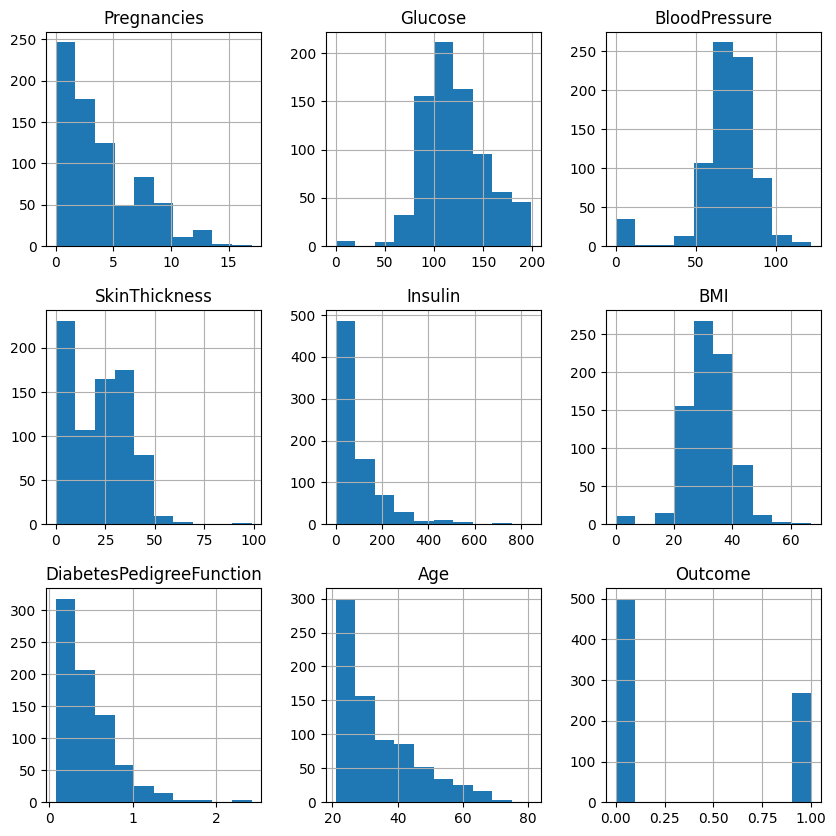

In [8]:
# Data Visualization

# Histogram
data.hist(bins=10, figsize=(10,10))
plt.show()

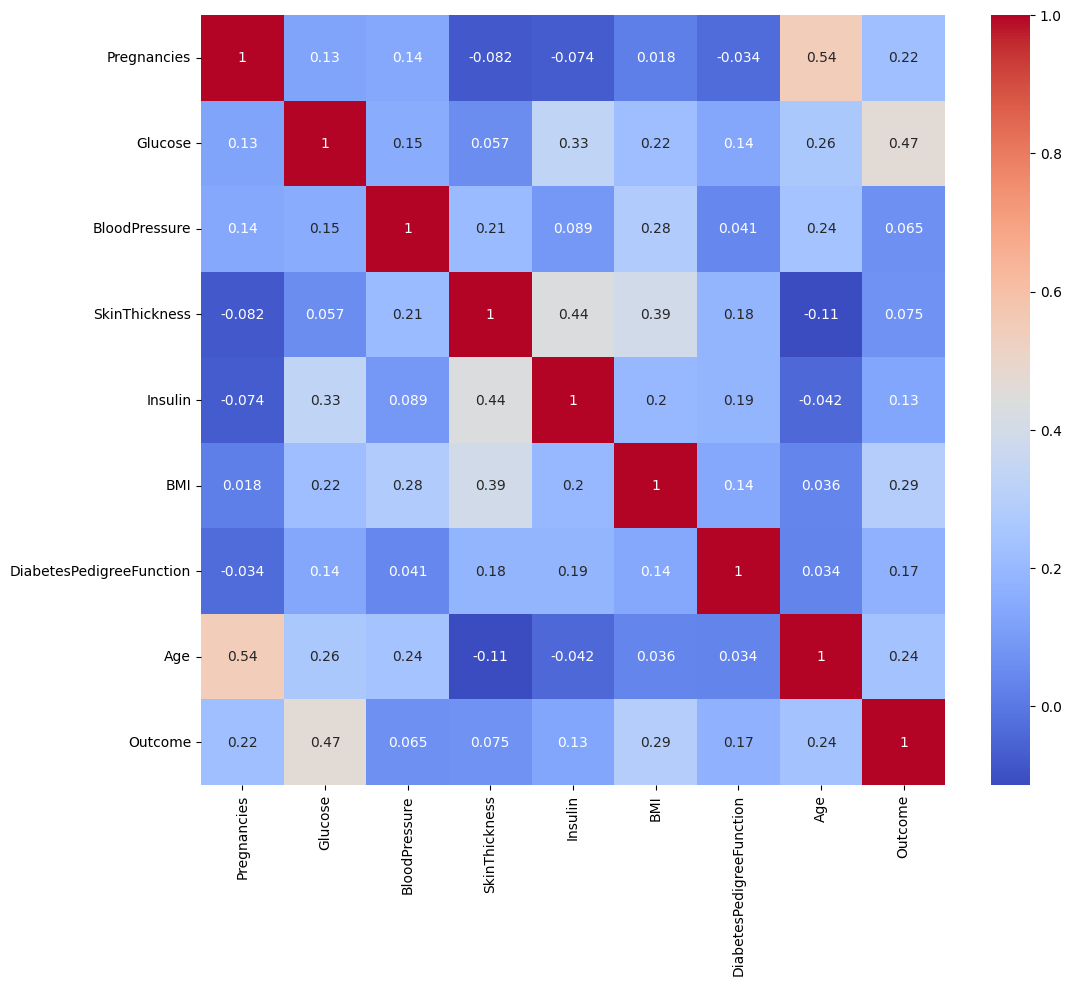

In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

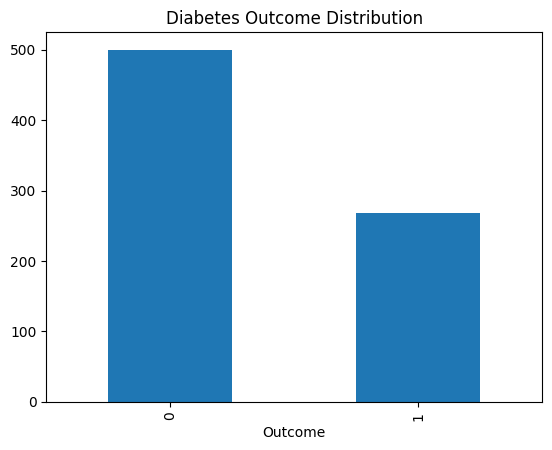

In [10]:
# Count plot of the target variable
data['Outcome'].value_counts().plot(kind='bar', title='Diabetes Outcome Distribution')
plt.show()

In [ ]:
# Pair plot
plt.figure(figsize=(12, 10))
sns.pairplot(data, hue='Outcome')
plt.show()

In [ ]:
# Box plot
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12, 10))
plt.show()

In [ ]:
# Removing outliers
print(f"Original data shape: {data.shape}")
from scipy import stats
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
print(f"Data shape after removing outliers: {data.shape}")

In [ ]:
# Scatter matrix after removing outliers
pd.plotting.scatter_matrix(data, figsize=(12, 12), diagonal='kde')
plt.show()

In [ ]:
# Splitting the data into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# List of models to train
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

In [ ]:
# Training and evaluating each model
accuracies = []
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append((name, accuracy))
  print(f"{name} Accuracy: {accuracy:.2f}")
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print("-" * 60)

In [ ]:
# Bar graph after evaluating accuracy of each model
model_names, model_accuracies = zip(*accuracies)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_names), y=list(model_accuracies))
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Example: Predicting with the best model
best_model = LogisticRegression()
best_model.fit(X_train, y_train)
sample_data = pd.DataFrame([[6, 148, 72, 35, 0, 33.6, 0.627, 50]], columns=X.columns)
sample_data_scaled = scaler.transform(sample_data)
prediction = best_model.predict(sample_data_scaled)

In [ ]:
# Mapping the prediction to readable output
outcome_map = {0: 'Non-diabetic', 1: 'Diabetic'}
predicted_outcome = outcome_map[prediction[0]]
print(f"Predicted Outcome: {predicted_outcome}")